In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/Creditcard_data.csv")

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler

samplers = {
    "Sampling1_SMOTE": SMOTE(random_state=42),
    "Sampling2_ADASYN": ADASYN(random_state=42),
    "Sampling3_RUS": RandomUnderSampler(random_state=42),
    "Sampling4_ROS": RandomOverSampler(random_state=42),
    "Sampling5_SMOTEENN": SMOTEENN(random_state=42)
}


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "M1_LogReg": LogisticRegression(max_iter=1000),
    "M2_DecTree": DecisionTreeClassifier(),
    "M3_RandForest": RandomForestClassifier(n_estimators=100),
    "M4_KNN": KNeighborsClassifier(),
    "M5_SVM": SVC()
}


In [6]:
from sklearn.metrics import accuracy_score

results = []

for s_name, sampler in samplers.items():
    X_res, y_res = sampler.fit_resample(X_train, y_train)

    for m_name, model in models.items():
        model.fit(X_res, y_res)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append([s_name, m_name, acc])


In [7]:
results_df = pd.DataFrame(results, columns=["Sampling", "Model", "Accuracy"])
print(results_df)


              Sampling          Model  Accuracy
0      Sampling1_SMOTE      M1_LogReg  0.939655
1      Sampling1_SMOTE     M2_DecTree  0.987069
2      Sampling1_SMOTE  M3_RandForest  0.991379
3      Sampling1_SMOTE         M4_KNN  0.948276
4      Sampling1_SMOTE         M5_SVM  0.965517
5     Sampling2_ADASYN      M1_LogReg  0.939655
6     Sampling2_ADASYN     M2_DecTree  0.974138
7     Sampling2_ADASYN  M3_RandForest  0.991379
8     Sampling2_ADASYN         M4_KNN  0.948276
9     Sampling2_ADASYN         M5_SVM  0.965517
10       Sampling3_RUS      M1_LogReg  0.693966
11       Sampling3_RUS     M2_DecTree  0.387931
12       Sampling3_RUS  M3_RandForest  0.681034
13       Sampling3_RUS         M4_KNN  0.896552
14       Sampling3_RUS         M5_SVM  0.836207
15       Sampling4_ROS      M1_LogReg  0.922414
16       Sampling4_ROS     M2_DecTree  0.987069
17       Sampling4_ROS  M3_RandForest  0.991379
18       Sampling4_ROS         M4_KNN  0.969828
19       Sampling4_ROS         M5_SVM  0

In [8]:
pivot = results_df.pivot(index="Model", columns="Sampling", values="Accuracy")
print(pivot)


Sampling       Sampling1_SMOTE  Sampling2_ADASYN  Sampling3_RUS  \
Model                                                             
M1_LogReg             0.939655          0.939655       0.693966   
M2_DecTree            0.987069          0.974138       0.387931   
M3_RandForest         0.991379          0.991379       0.681034   
M4_KNN                0.948276          0.948276       0.896552   
M5_SVM                0.965517          0.965517       0.836207   

Sampling       Sampling4_ROS  Sampling5_SMOTEENN  
Model                                             
M1_LogReg           0.922414            0.943966  
M2_DecTree          0.987069            0.978448  
M3_RandForest       0.991379            0.987069  
M4_KNN              0.969828            0.935345  
M5_SVM              0.965517            0.956897  


In [9]:
best = results_df.loc[results_df["Accuracy"].idxmax()]
print("\nBEST COMBINATION:")
print(best)



BEST COMBINATION:
Sampling    Sampling1_SMOTE
Model         M3_RandForest
Accuracy           0.991379
Name: 2, dtype: object


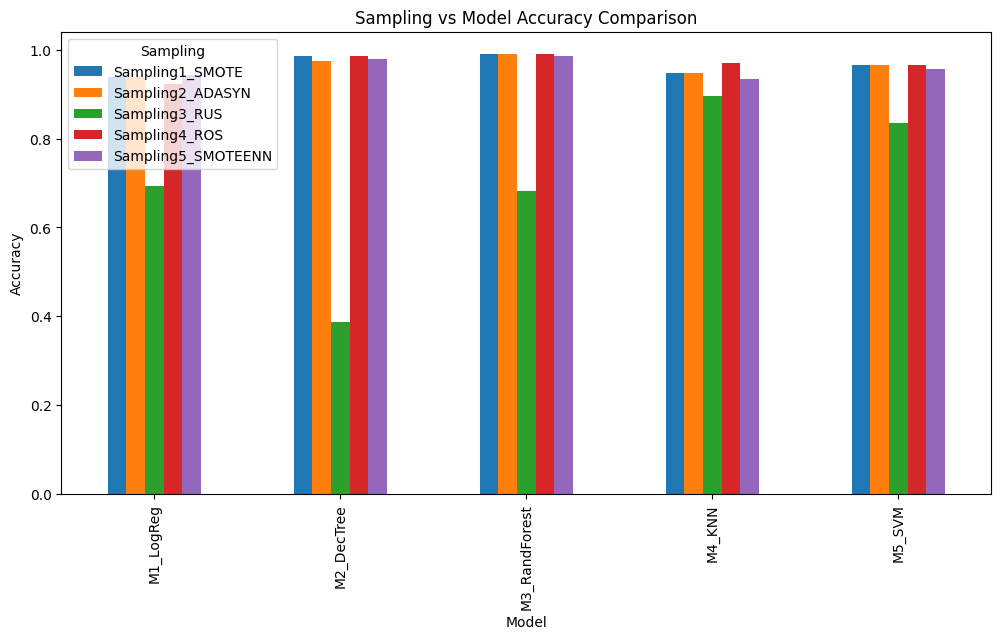

In [10]:
import matplotlib.pyplot as plt

pivot.plot(kind="bar", figsize=(12,6))
plt.ylabel("Accuracy")
plt.title("Sampling vs Model Accuracy Comparison")
plt.show()



BEST SAMPLING TECHNIQUE FOR EACH MODEL:

              Sampling          Model  Accuracy
20  Sampling5_SMOTEENN      M1_LogReg  0.943966
1      Sampling1_SMOTE     M2_DecTree  0.987069
2      Sampling1_SMOTE  M3_RandForest  0.991379
18       Sampling4_ROS         M4_KNN  0.969828
4      Sampling1_SMOTE         M5_SVM  0.965517


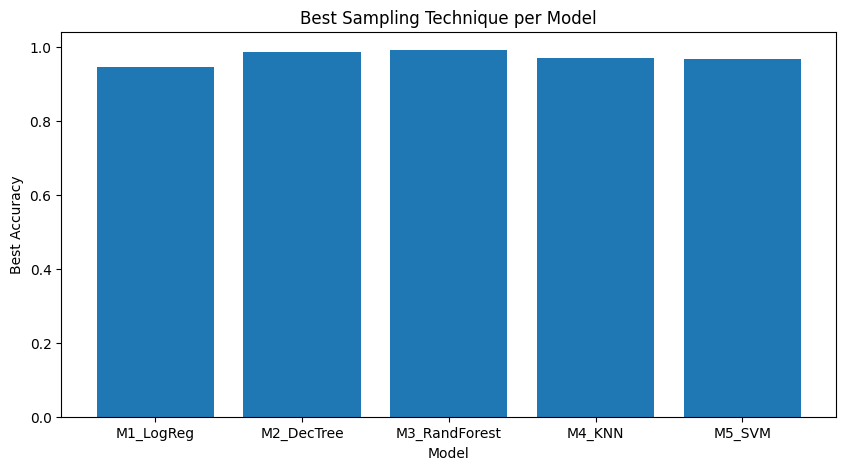

In [11]:
import pandas as pd
import matplotlib.pyplot as plt



best_per_model = results_df.loc[
    results_df.groupby("Model")["Accuracy"].idxmax()
]

print("\nBEST SAMPLING TECHNIQUE FOR EACH MODEL:\n")
print(best_per_model)

plt.figure(figsize=(10,5))
plt.bar(best_per_model["Model"], best_per_model["Accuracy"])
plt.xlabel("Model")
plt.ylabel("Best Accuracy")
plt.title("Best Sampling Technique per Model")
plt.show()
